In [29]:
import osmnx
import networkx
import pickle
import main
network_types = ["bike", "walk", "drive"]

In [21]:

## LOADS DATA INTO DATA FOLDER TO MAKE IT EASIER TO LOAD CITY GRAPHS 

for type in network_types:
    graph = osmnx.graph_from_place("Philadelphia, Pennsylvania, USA", network_type=type)

    with open(f"datta/graphs/city_graph_{type}.pkl", "wb") as file:
        pickle.dump(graph, file)

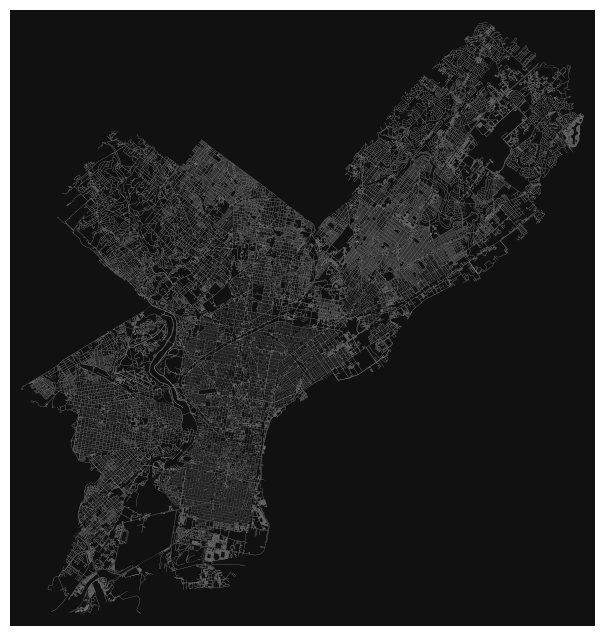

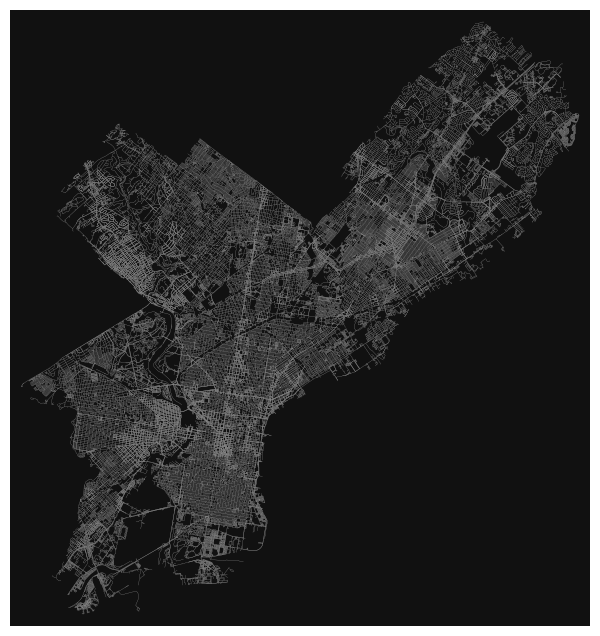

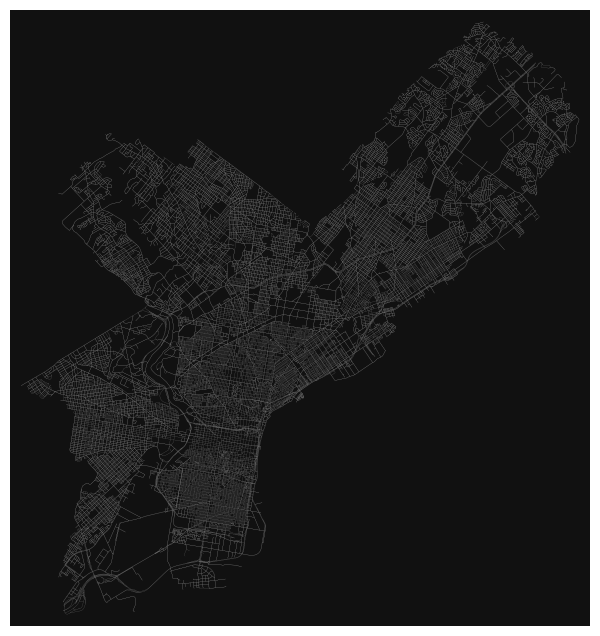

In [3]:
graph = []
for index, type in enumerate(network_types):
    with open(f"data/graphs/city_graph_{type}.pkl", "rb") as file:
        graph.append(pickle.load(file))

    osmnx.plot_graph(graph[index], node_size=0, edge_linewidth=0.1, save=True, filepath=f"data/graphs/city_graph_{type}.png")


In [73]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("data/cartodb-query.csv")

coordinates = df[["point_x", "point_y"]].values.tolist()

# Initialize an empty list to store valid coordinates
valid_coordinates = []

# Loop through each row using iterrows()
for index, row in df.iterrows():
    point_y = row["point_y"]
    point_x = row["point_x"]

    # Check if values are not NaN
    if pd.notna(point_y) and pd.notna(point_x):
        valid_coordinates.append((point_y, point_x))  # Append as a tuple

# Print the collected valid coordinates
print("Valid coordinates collected:", valid_coordinates[0:100])


# columns = df.columns.tolist()

# Print the columns
# print(coordinates)


# Display the first few rows
# print(df.head())


Valid coordinates collected: [(39.93624675, -75.23212511), (40.02897422, -75.08318828), (39.95388172, -75.17264175), (39.92920082, -75.14352594), (39.93799162, -75.16762896), (40.03006942, -75.05602341), (39.93941627, -75.1573691), (39.93860812, -75.16751883), (39.9294464, -75.14829537), (39.92686812, -75.14568824), (40.03186207, -75.10631911), (39.95675137, -75.20794146), (39.92217441, -75.14237468), (40.07425783, -75.20273278), (39.969779, -75.175406), (40.02149961, -75.13345593), (40.05254891, -75.00530916), (39.94514881, -75.17224503), (40.05555537, -75.04919712), (40.0248, -75.214504), (40.03940218, -75.03285621), (40.03307537, -75.08454832), (39.91857003, -75.18530186), (40.03767623, -75.0392667), (40.01223821, -75.06693892), (39.97425413, -75.13951476), (39.883489, -75.23237), (39.883489, -75.23237), (40.02714539, -75.13863518), (39.97400838, -75.16191943), (40.016611, -75.147184), (39.92254728, -75.18515149), (39.93681755, -75.15935683), (39.99539085, -75.1868302), (39.95196792

In [5]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("data/crime_data.csv")

# Extract unique items from the 'text_general_code' column and store them in a set
unique_codes = df["text_general_code"].dropna().unique()
codes_dict = {code: 0 for code in unique_codes}


# Print the set of unique codes
print("Unique items in text_general_code:", codes_dict)


Unique items in text_general_code: {'Other Assaults': 0, 'Aggravated Assault No Firearm': 0, 'Aggravated Assault Firearm': 0, 'Thefts': 0, 'Weapon Violations': 0, 'All Other Offenses': 0, 'Vandalism/Criminal Mischief': 0, 'Motor Vehicle Theft': 0, 'Robbery No Firearm': 0, 'Theft from Vehicle': 0, 'Narcotic / Drug Law Violations': 0, 'Fraud': 0, 'Arson': 0, 'Embezzlement': 0, 'Burglary Non-Residential': 0, 'Burglary Residential': 0, 'Other Sex Offenses (Not Commercialized)': 0, 'Receiving Stolen Property': 0, 'Robbery Firearm': 0, 'Vagrancy/Loitering': 0, 'Rape': 0, 'Offenses Against Family and Children': 0, 'Disorderly Conduct': 0, 'DRIVING UNDER THE INFLUENCE': 0, 'Prostitution and Commercialized Vice': 0, 'Forgery and Counterfeiting': 0, 'Public Drunkenness': 0, 'Homicide - Criminal': 0, 'Liquor Law Violations': 0, 'Gambling Violations': 0, 'Homicide - Justifiable': 0, 'Homicide - Gross Negligence': 0}


In [12]:
import folium
from folium.plugins import HeatMap
import geopandas as gpd
import pandas as pd

# Read the CSV file
df = pd.read_csv("data/crime_data.csv")

coordinates = df[["point_x", "point_y"]].values.tolist()

# Initialize an empty list to store valid coordinates
valid_coordinates = []
loc_crime=[]
# Loop through each row using iterrows()
for index, row in df.iterrows():
    point_y = row["point_y"]
    point_x = row["point_x"]
    crime=  row["text_general_code"]
    dispatch_date_time = row["dispatch_date_time"]

    # Check if values are not NaN
    if pd.notna(point_y) and pd.notna(point_x) and pd.notna(dispatch_date_time) and pd.notna(crime):
        if not (
            dispatch_date_time.split("-")[0] == "2024"
            and dispatch_date_time.split("-")[1] == "09"
        ):
            continue
        print(dispatch_date_time)
        valid_coordinates.append((point_y, point_x))  # Append as a tuple
        # Loc+Crime
        loc_crime.append((point_y,point_x,crime))
# # Step 1: Get geographic data
# # You can download points of interest (POIs) from OpenStreetMap using osmnx or any source
# # Let's take POIs in Philadelphia for example
# gdf = osmnx.geometries_from_place("Philadelphia, Pennsylvania, USA", tags={'amenity':True})

# # Extract the coordinates of the POIs
# gdf_points = gdf[gdf.geometry.type == 'Point']
# # coordinates = [(point.y, point.x) for point in gdf_points.geometry]

# # Step 2: Create a map
# m = folium.Map(location=[39.9, -75.0], zoom_start=8)

# # Step 3: Add the heatmap layer
# HeatMap(valid_coordinates, radius=15, blur=10, max_val=1).add_to(m)

# # Step 4: Save the map as an HTML file
# m.save("density_map.html")

# # This will create an interactive density map


2024-09-30 23:55:00+00
2024-09-30 23:50:00+00
2024-09-30 23:49:00+00
2024-09-30 23:48:00+00
2024-09-30 23:44:00+00
2024-09-30 23:43:00+00
2024-09-30 23:40:00+00
2024-09-30 23:38:00+00
2024-09-30 23:36:00+00
2024-09-30 23:35:00+00
2024-09-30 23:35:00+00
2024-09-30 23:33:00+00
2024-09-30 23:32:00+00
2024-09-30 23:29:00+00
2024-09-30 23:28:00+00
2024-09-30 23:24:00+00
2024-09-30 23:23:00+00
2024-09-30 23:19:00+00
2024-09-30 23:17:00+00
2024-09-30 23:16:00+00
2024-09-30 23:04:00+00
2024-09-30 23:03:00+00
2024-09-30 23:03:00+00
2024-09-30 22:58:00+00
2024-09-30 22:57:00+00
2024-09-30 22:48:00+00
2024-09-30 22:47:00+00
2024-09-30 22:39:00+00
2024-09-30 22:39:00+00
2024-09-30 22:37:00+00
2024-09-30 22:33:00+00
2024-09-30 22:30:00+00
2024-09-30 22:29:00+00
2024-09-30 22:28:00+00
2024-09-30 22:27:00+00
2024-09-30 22:27:00+00
2024-09-30 22:27:00+00
2024-09-30 22:25:00+00
2024-09-30 22:25:00+00
2024-09-30 22:21:00+00
2024-09-30 22:19:00+00
2024-09-30 22:19:00+00
2024-09-30 22:19:00+00
2024-09-30 

In [14]:
edge_crimes = {}
for lon, lat, crime in loc_crime:
    nearest_edge = osmnx.distance.nearest_edges(graph[1], lon, lat)
        
    # Add the crime committed on each of the list 
    if nearest_edge not in edge_crimes:
        edge_crimes[nearest_edge] = []
    edge_crimes[nearest_edge].append(crime)
    



KeyboardInterrupt: 

[(40.03101382, -75.18879279, 'Theft from Vehicle'),
 (39.96781437, -75.16062937, 'Theft from Vehicle'),
 (40.03558068, -75.10740858, 'Thefts'),
 (40.024529, -75.056207, 'Motor Vehicle Theft'),
 (40.00816115, -75.16131541, 'Motor Vehicle Theft'),
 (40.0434, -75.143765, 'Receiving Stolen Property'),
 (40.10586452, -75.00330626, 'Thefts'),
 (39.96489704, -75.22459125, 'Other Assaults'),
 (39.984401, -75.109339, 'Vandalism/Criminal Mischief'),
 (39.99555966, -75.15037204, 'Other Assaults'),
 (40.05886422, -75.05373853, 'Aggravated Assault Firearm'),
 (39.97088125, -75.2408585, 'Other Assaults'),
 (40.01958896, -75.13997087, 'Thefts'),
 (39.962125, -75.137394, 'Theft from Vehicle'),
 (40.02554527, -75.06509316, 'Other Assaults'),
 (39.95675137, -75.20794146, 'Thefts'),
 (39.99285067, -75.12220319, 'Narcotic / Drug Law Violations'),
 (40.039151, -75.110012, 'Thefts'),
 (40.031709, -75.092242, 'DRIVING UNDER THE INFLUENCE'),
 (40.01493683, -75.14847211, 'All Other Offenses'),
 (40.1131061, -7

In [55]:
from collections import defaultdict

def sum_in_edge(crimes):
    return sum(main.crime_weights[crime]*10 for crime in crimes)

def normalize_score(score, min_score, max_score):
    return (score - min_score) / (max_score - min_score)

def assign_crimes_to_edges_with_scores(G, crime_data, crime_weights):
    # Extract latitudes, longitudes, and crimes into separate arrays for batch processing
    longitudes, latitudes, crimes = zip(*crime_data)
    
    # Use osmnx's batch nearest_edges function for better performance
    nearest_edges = osmnx.distance.nearest_edges(G, X=longitudes, Y=latitudes)
    
    edge_scores = defaultdict(float)
    
    # Step 1: Sum danger scores for each edge
    for edge, crime in zip(nearest_edges, crimes):
        edge_scores[edge] += crime_weights[crime] * 10  # Using the crime weights
    
    # Step 2: Normalize the danger scores
    all_scores = list(edge_scores.values())
    min_score, max_score = min(all_scores), max(all_scores)
    
    # Step 3: Normalize the scores for each edge
    for edge in edge_scores:
        edge_scores[edge] = normalize_score(edge_scores[edge], min_score, max_score)
    
    # Step 4: Assign the normalized scores to the edges in the graph as 'weight'
    for edge in G.edges:
        G.edges[edge]['weight'] = edge_scores.get(edge, 0.1)  # Default low weight if no crimes occurred

    return G


In [56]:
weighted_graph_walk = assign_crimes_to_edges_with_scores(graph[1], loc_crime, main.crime_weights)